**M 14 - EXERCÍCIO  1**

• Crie um jupyter notebook com os imports necessários e um código para gerar os
gráficos referentes a base de dados de março, abril, maio, junho e dezembro
(numa célula só ou em várias).

• Como que você poderia fazer para deixar isso mais automatizado? Descreva na
última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos
pros meses/anos seguintes.

**SINASC RO 2019 – Análise Comparativa Mensal (Mar, Abr, Mai, Jun, Dez)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Configurações visuais
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
# Carregar as bases mensais
arquivos = {
    "Março": "/content/SINASC_RO_2019_MAR.csv",
    "Abril": "/content/SINASC_RO_2019_ABR.csv",
    "Maio": "/content/SINASC_RO_2019_MAI.csv",
    "Junho": "/content/SINASC_RO_2019_JUN.csv",
    "Dezembro": "/content/SINASC_RO_2019_DEZ.csv"
}

bases = {}
for mes, caminho in arquivos.items():
    if os.path.exists(caminho):
        bases[mes] = pd.read_csv(caminho)
        bases[mes]['MES'] = mes
    else:
        print(f"Aviso: arquivo de {mes} não encontrado!")

In [5]:
# Combina todos os meses em um único DataFrame
df = pd.concat(bases.values(), ignore_index=True)
print(f"Total de registros combinados: {len(df)}")

Total de registros combinados: 68429


 GRÁFICOS COMPARATIVOS

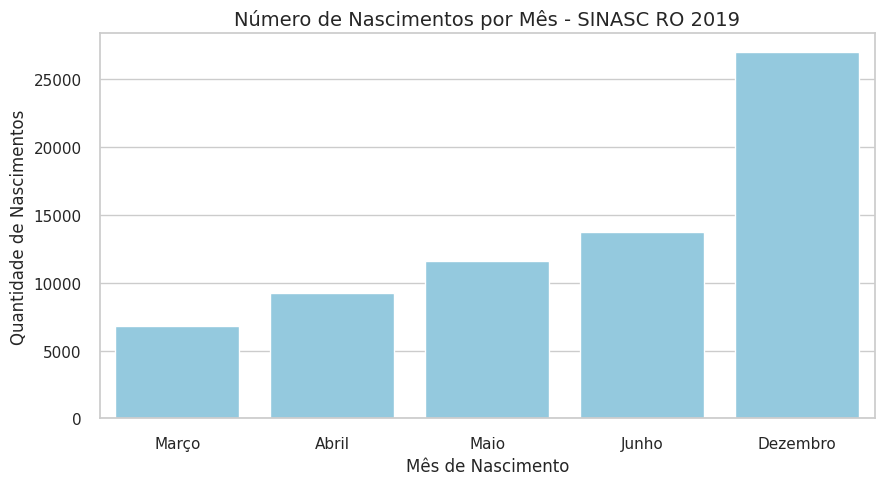

In [13]:
# Número de nascimentos por mês (barras verticais)
plt.figure()
sns.countplot(data=df, x='MES', order=arquivos.keys(), color='skyblue')
plt.title('Número de Nascimentos por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês de Nascimento')
plt.ylabel('Quantidade de Nascimentos')
plt.show()

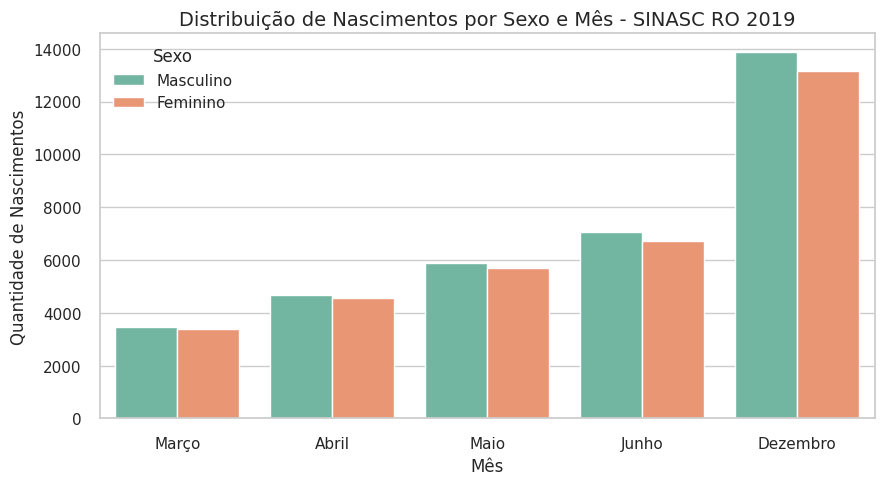

In [12]:
#Distribuição de nascimentos por sexo (barras agrupadas)
plt.figure()
sns.countplot(data=df, x='MES', hue='SEXO', order=arquivos.keys())
plt.title('Distribuição de Nascimentos por Sexo e Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Nascimentos')
plt.legend(title='Sexo')
plt.show()

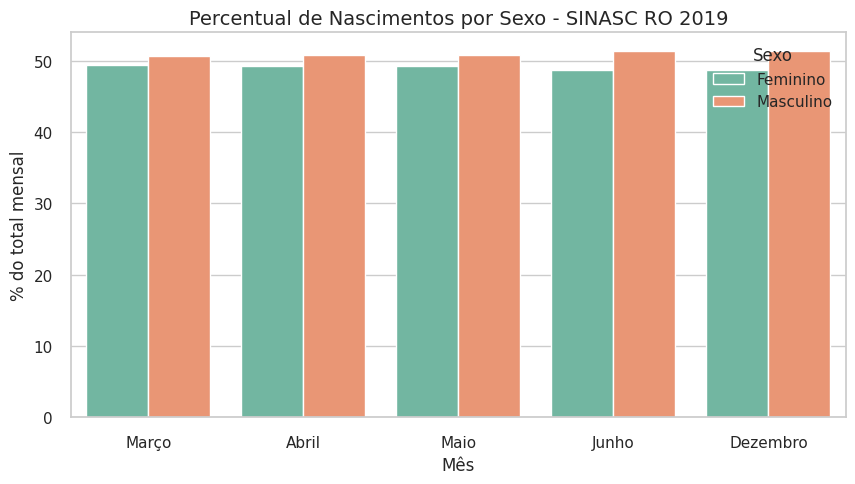

In [14]:
# Percentual de nascimentos por sexo (barras empilhadas)
sexo_por_mes = df.groupby(['MES', 'SEXO']).size().reset_index(name='contagem')
total_mes = sexo_por_mes.groupby('MES')['contagem'].transform('sum')
sexo_por_mes['percentual'] = sexo_por_mes['contagem'] / total_mes * 100

plt.figure()
sns.barplot(data=sexo_por_mes, x='MES', y='percentual', hue='SEXO', order=arquivos.keys())
plt.title('Percentual de Nascimentos por Sexo - SINASC RO 2019', fontsize=14)
plt.ylabel('% do total mensal')
plt.xlabel('Mês')
plt.legend(title='Sexo')
plt.show()

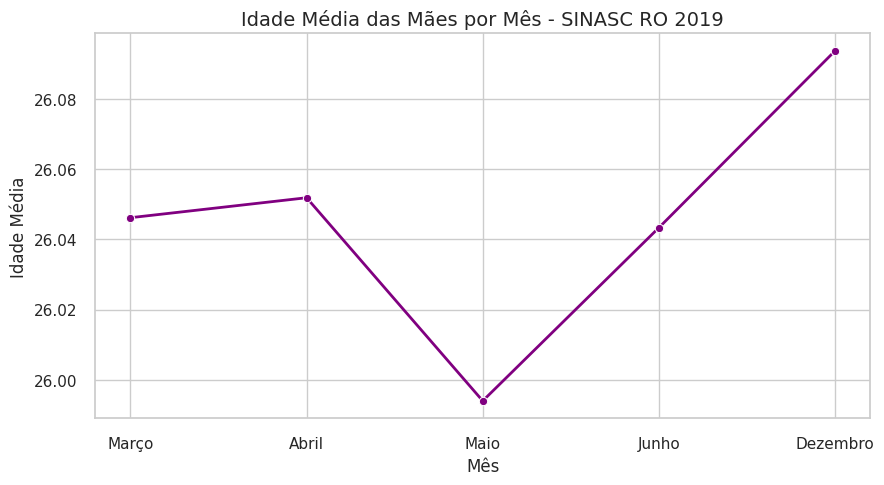

In [10]:
# Idade média da mãe por mês (linha com pontos)
plt.figure()
idade_media = df.groupby('MES')['IDADEMAE'].mean().reindex(arquivos.keys())
sns.lineplot(x=idade_media.index, y=idade_media.values, marker='o', linewidth=2, color='purple')
plt.title('Idade Média das Mães por Mês - SINASC RO 2019', fontsize=14)
plt.ylabel('Idade Média')
plt.xlabel('Mês')
plt.show()

/tmp/ipython-input-2085330160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MES', y='IDADEMAE', order=arquivos.keys(), palette="pastel")


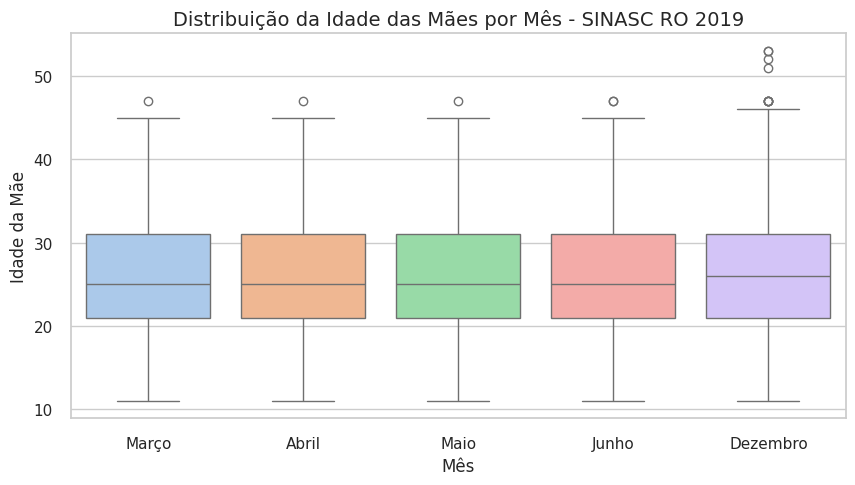

In [15]:
#Distribuição da idade das mães (boxplot)
plt.figure()
sns.boxplot(data=df, x='MES', y='IDADEMAE', order=arquivos.keys(), palette="pastel")
plt.title('Distribuição da Idade das Mães por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Idade da Mãe')
plt.show()

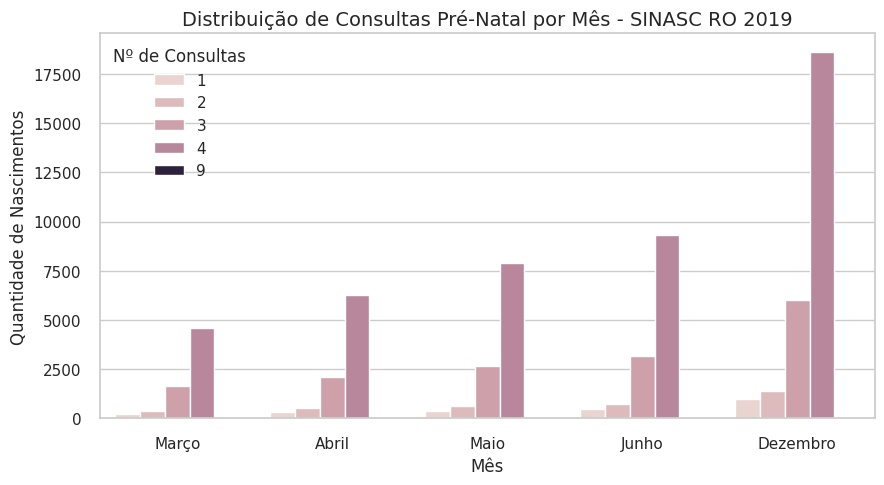

In [21]:
# Distribuição de consultas pré-natal por mês
plt.figure()
sns.countplot(data=df, x='MES', hue='CONSULTAS', order=arquivos.keys())
plt.title('Distribuição de Consultas Pré-Natal por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Nascimentos')
plt.legend(title='Nº de Consultas')
plt.show()

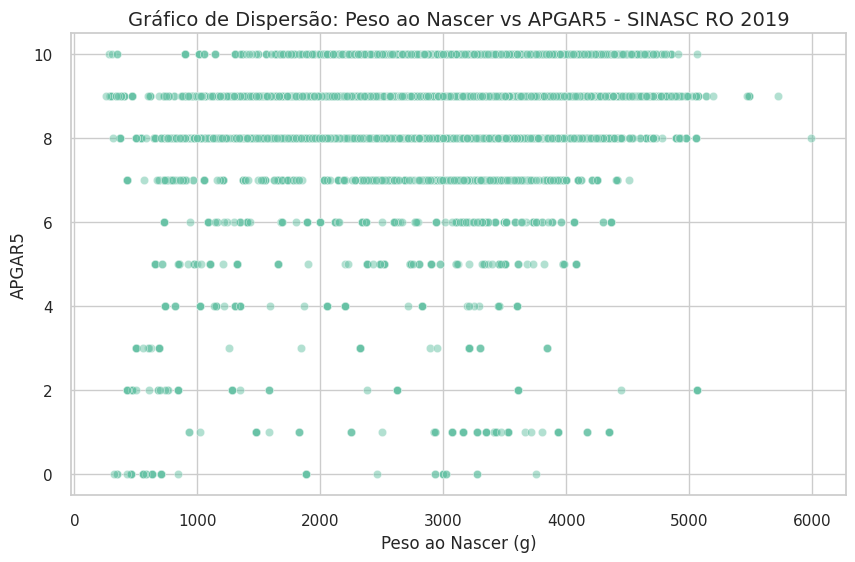

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PESO', y='APGAR5', alpha=0.5)
plt.title('Gráfico de Dispersão: Peso ao Nascer vs APGAR5 - SINASC RO 2019', fontsize=14)
plt.xlabel('Peso ao Nascer (g)')
plt.ylabel('APGAR5')
plt.show()

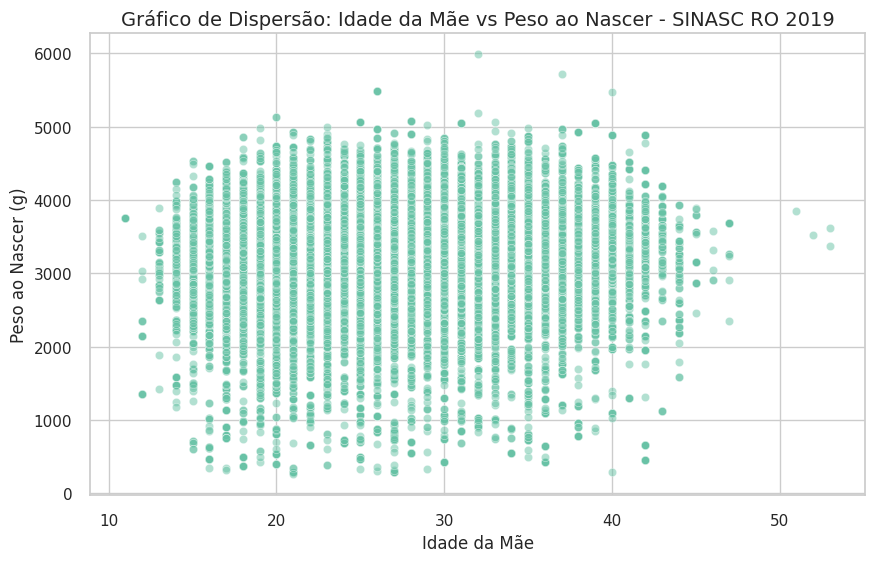

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IDADEMAE', y='PESO', alpha=0.5)
plt.title('Gráfico de Dispersão: Idade da Mãe vs Peso ao Nascer - SINASC RO 2019', fontsize=14)
plt.xlabel('Idade da Mãe')
plt.ylabel('Peso ao Nascer (g)')
plt.show()

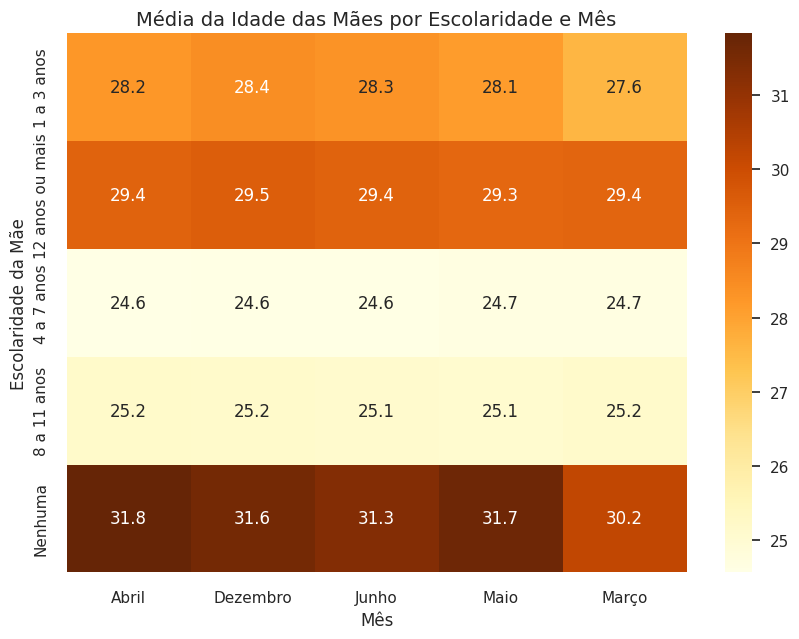

In [81]:
# Mapa de calor (heatmap) – média de idade da mãe por mês e escolaridade da mãe
tabela_heat_escmae = df.pivot_table(values='IDADEMAE', index='ESCMAE', columns='MES', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(tabela_heat_escmae, annot=True, cmap='YlOrBr', fmt='.1f')
plt.title('Média da Idade das Mães por Escolaridade e Mês', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Escolaridade da Mãe')
plt.show()

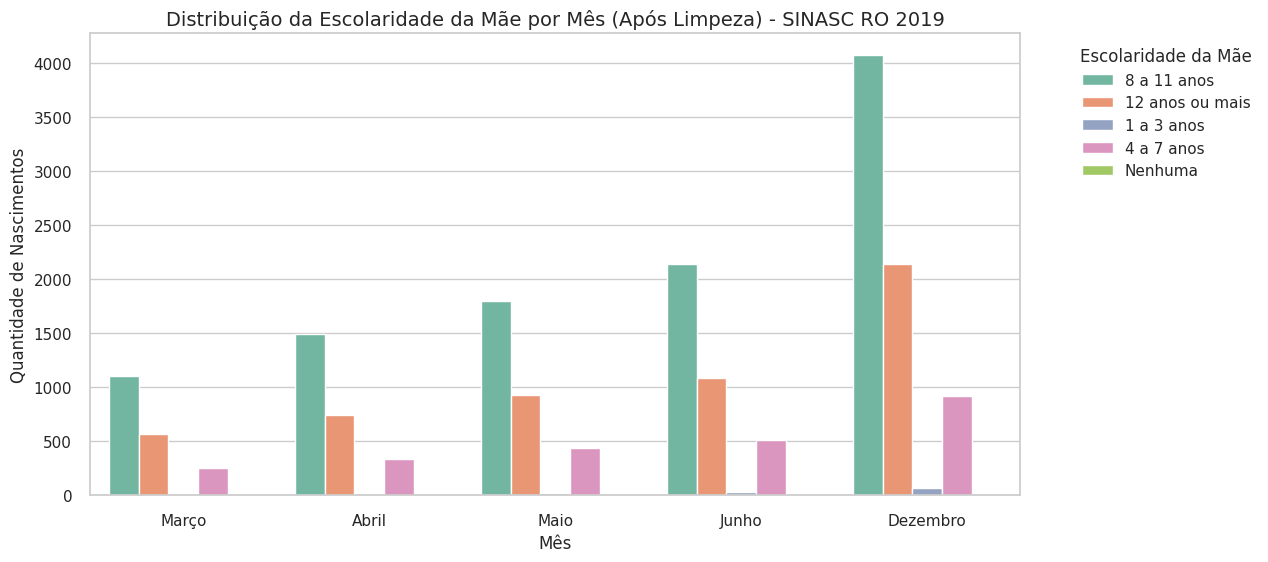

In [76]:
# Distribuição de Escolaridade da Mãe por mês (barras agrupadas) usando df_cleaned
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='MES', hue='ESCMAE', order=arquivos.keys())
plt.title('Distribuição da Escolaridade da Mãe por Mês (Após Limpeza) - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Nascimentos')
plt.legend(title='Escolaridade da Mãe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

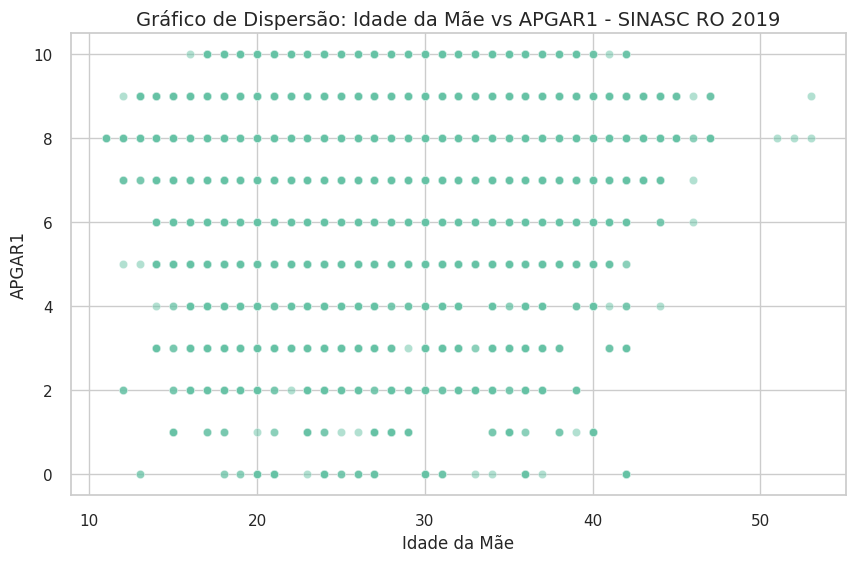

In [74]:
# Gráfico de Dispersão: Idade da Mãe vs APGAR1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IDADEMAE', y='APGAR1', alpha=0.5)
plt.title('Gráfico de Dispersão: Idade da Mãe vs APGAR1 - SINASC RO 2019', fontsize=14)
plt.xlabel('Idade da Mãe')
plt.ylabel('APGAR1')
plt.show()

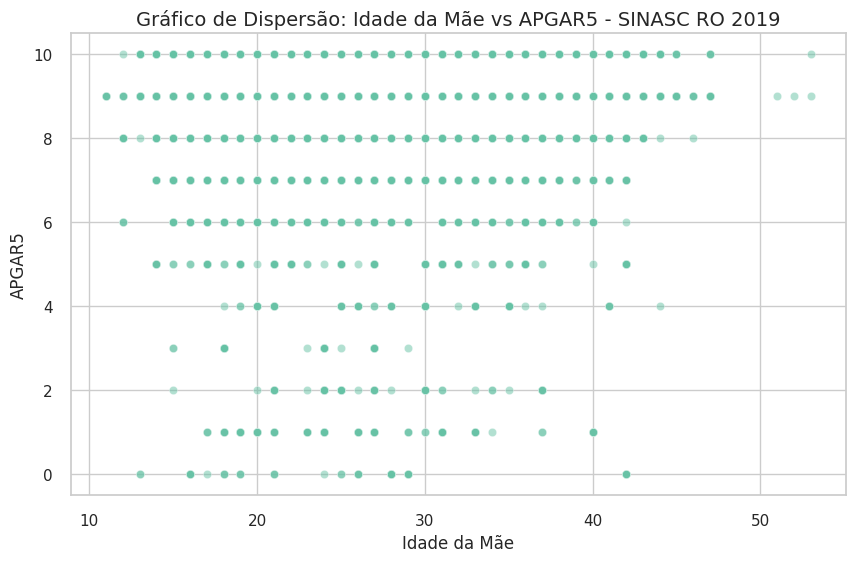

In [75]:
# Gráfico de Dispersão: Idade da Mãe vs APGAR5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IDADEMAE', y='APGAR5', alpha=0.5)
plt.title('Gráfico de Dispersão: Idade da Mãe vs APGAR5 - SINASC RO 2019', fontsize=14)
plt.xlabel('Idade da Mãe')
plt.ylabel('APGAR5')
plt.show()

/tmp/ipython-input-1175256437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='ESCMAE', y='IDADEMAE', order=df_cleaned['ESCMAE'].value_counts().index, palette='viridis')


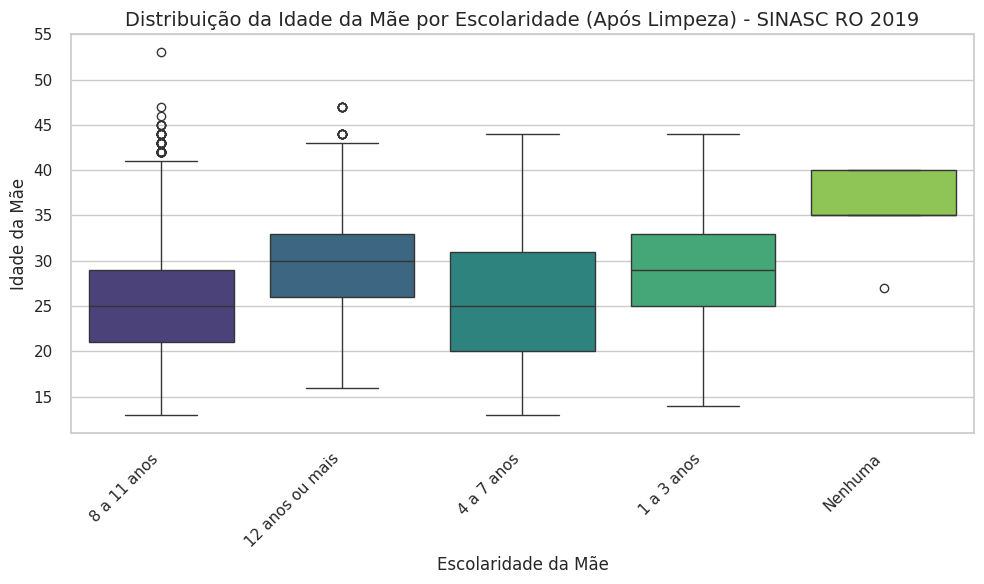

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='ESCMAE', y='IDADEMAE', order=df_cleaned['ESCMAE'].value_counts().index, palette='viridis')
plt.title('Distribuição da Idade da Mãe por Escolaridade (Após Limpeza) - SINASC RO 2019', fontsize=14)
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Idade da Mãe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

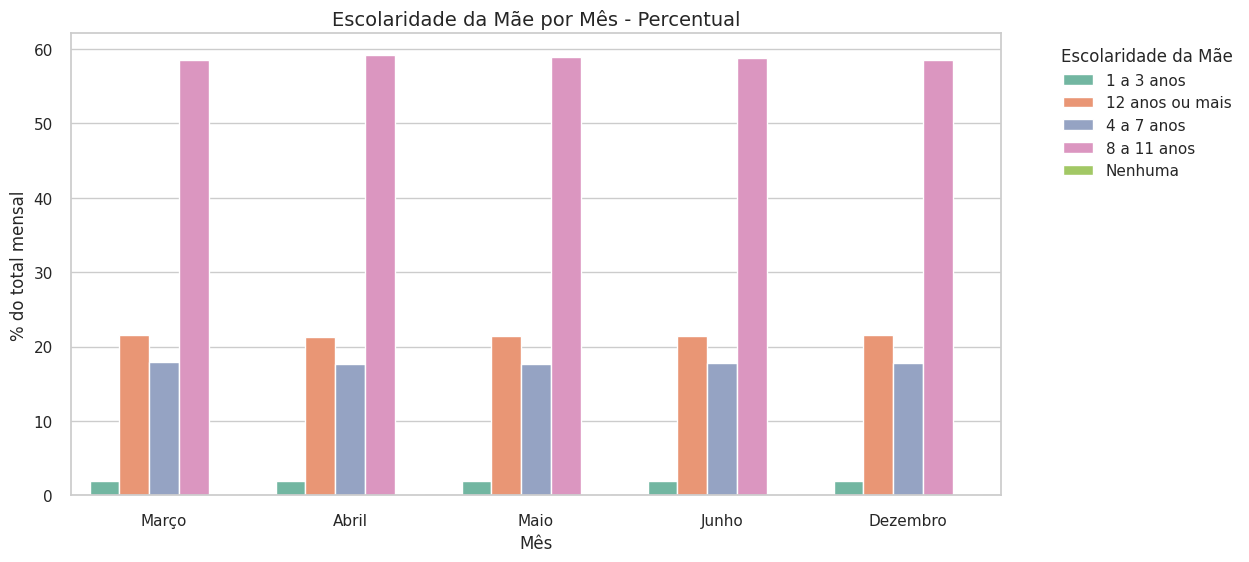

In [70]:
# Distribuição de Escolaridade da Mãe por mês (barras empilhadas)
escmae_mes = df.groupby(['MES', 'ESCMAE']).size().reset_index(name='contagem')
total_escmae_mes = escmae_mes.groupby('MES')['contagem'].transform('sum')
escmae_mes['percentual'] = escmae_mes['contagem'] / total_escmae_mes * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=escmae_mes, x='MES', y='percentual', hue='ESCMAE', order=arquivos.keys())
plt.title('Escolaridade da Mãe por Mês - Percentual', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('% do total mensal')
plt.legend(title='Escolaridade da Mãe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

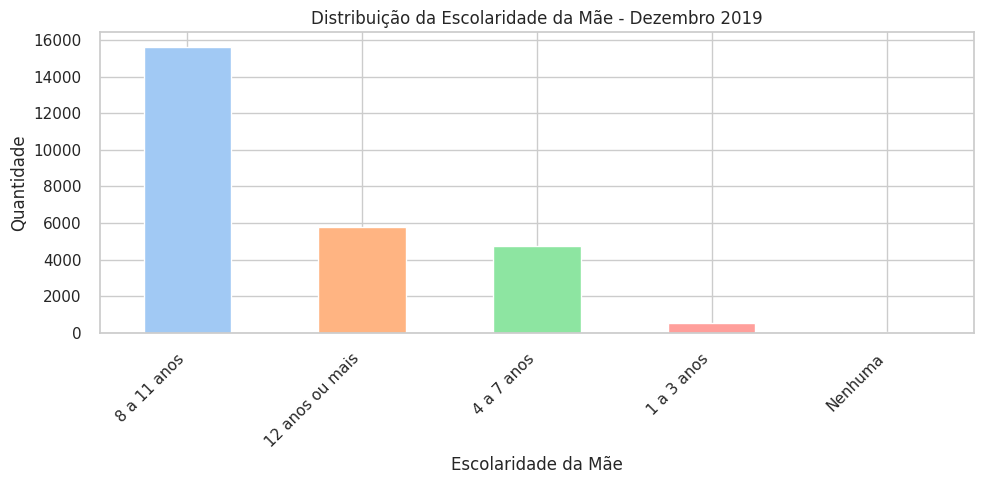

In [72]:
# Gráfico de barras (composição por escolaridade da mãe em dezembro)
dez_escmae = df[df['MES'] == 'Dezembro']['ESCMAE'].value_counts()
plt.figure()
dez_escmae.plot.bar(color=sns.color_palette('pastel'))
plt.title('Distribuição da Escolaridade da Mãe - Dezembro 2019')
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

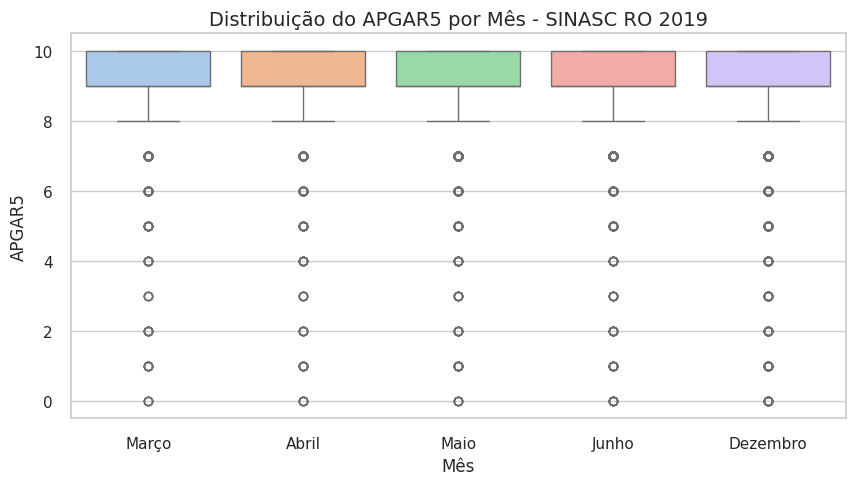

In [33]:
# Distribuição do APGAR5 por mês (boxplot)
plt.figure()
sns.boxplot(data=df, x='MES', y='APGAR5', order=arquivos.keys(), hue='MES', palette="pastel", legend=False)
plt.title('Distribuição do APGAR5 por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('APGAR5')
plt.show()

In [19]:
print(df.columns)

Index(['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
       'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI', 'MES'],
      dtype='object')


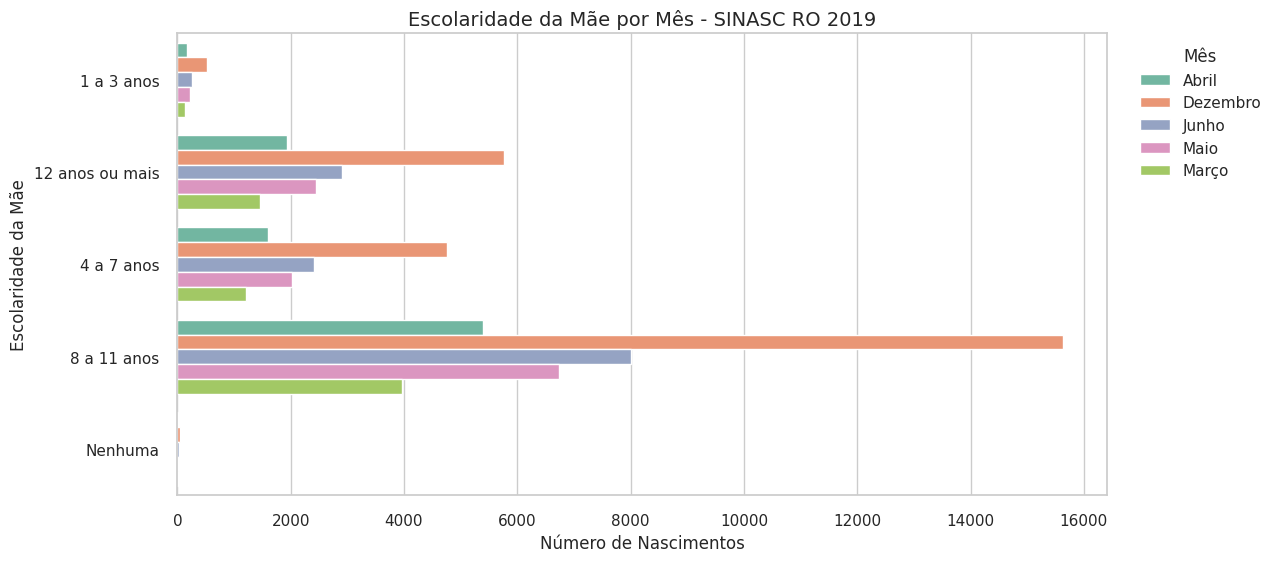

In [23]:
# Escolaridade da mãe (gráfico de barras horizontais) ===
esc_mae = df.groupby(['MES', 'ESCMAE']).size().reset_index(name='contagem')
plt.figure(figsize=(12,6))
sns.barplot(data=esc_mae, y='ESCMAE', x='contagem', hue='MES', orient='h')
plt.title('Escolaridade da Mãe por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Número de Nascimentos')
plt.ylabel('Escolaridade da Mãe')
plt.legend(title='Mês', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

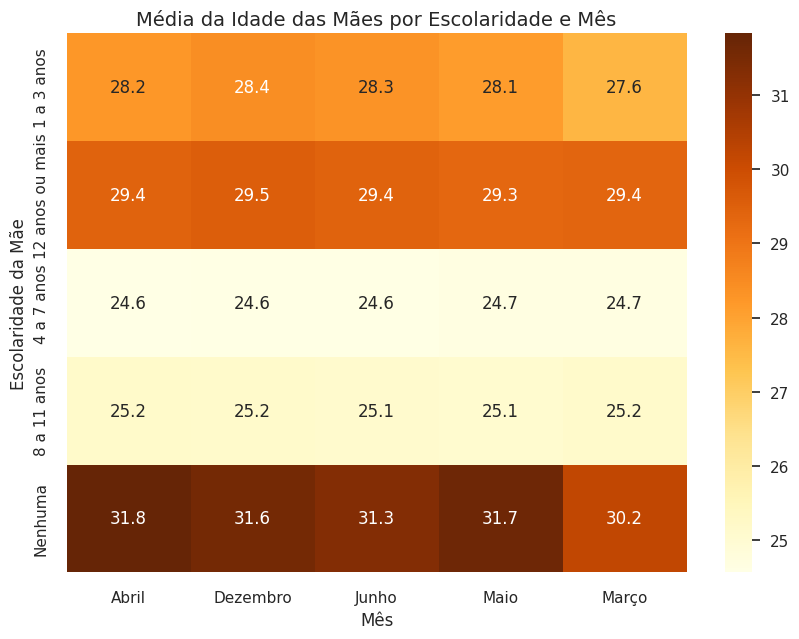

In [71]:
# Mapa de calor (heatmap) – média de idade da mãe por mês e escolaridade da mãe
tabela_heat_escmae = df.pivot_table(values='IDADEMAE', index='ESCMAE', columns='MES', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(tabela_heat_escmae, annot=True, cmap='YlOrBr', fmt='.1f')
plt.title('Média da Idade das Mães por Escolaridade e Mês', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Escolaridade da Mãe')
plt.show()

In [65]:
# Remover linhas com quaisquer valores ausentes
df_cleaned = df.dropna().copy()

print(f"Número original de registros: {len(df)}")
print(f"Número de registros após remover linhas com ausentes: {len(df_cleaned)}")

# Verificar se ainda há valores ausentes no novo DataFrame
print("\nValores ausentes no DataFrame limpo:")
print(df_cleaned.isnull().sum())

Número original de registros: 68429
Número de registros após remover linhas com ausentes: 18699

Valores ausentes no DataFrame limpo:
IDADEMAE     0
SEXO         0
APGAR1       0
APGAR5       0
PESO         0
CONSULTAS    0
DTNASC       0
GESTACAO     0
GRAVIDEZ     0
ESCMAE       0
IDADEPAI     0
MES          0
dtype: int64


In [58]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
IDADEMAE         0
SEXO            12
APGAR1         234
APGAR5         261
PESO             0
CONSULTAS        0
DTNASC           0
GESTACAO      3164
GRAVIDEZ       186
ESCMAE         770
IDADEPAI     48700
MES              0
dtype: int64


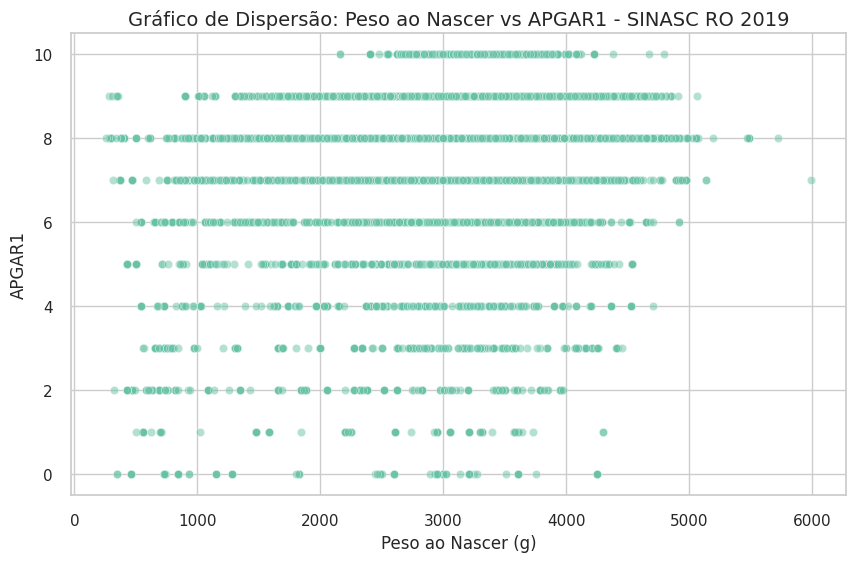

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PESO', y='APGAR1', alpha=0.5)
plt.title('Gráfico de Dispersão: Peso ao Nascer vs APGAR1 - SINASC RO 2019', fontsize=14)
plt.xlabel('Peso ao Nascer (g)')
plt.ylabel('APGAR1')
plt.show()

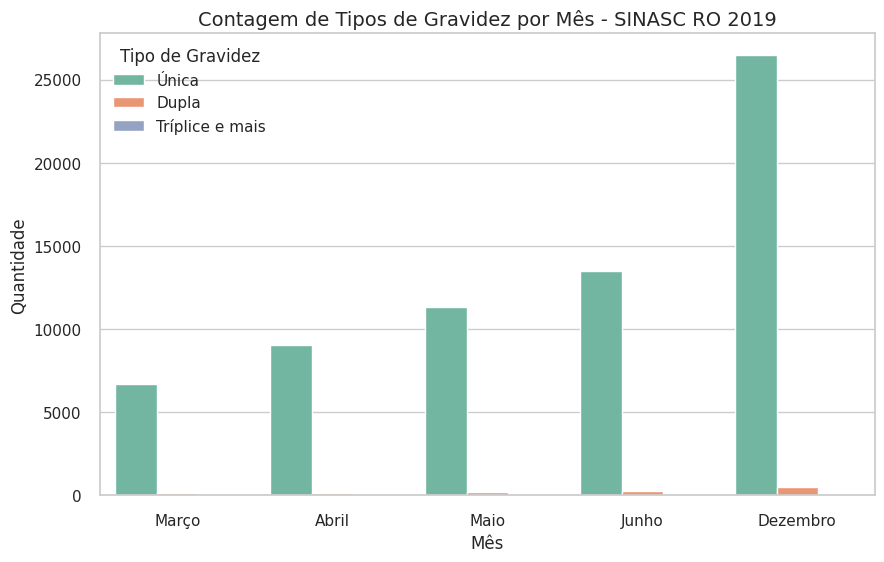

In [27]:
# Contagem de tipos de gravidez por mês
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MES', hue='GRAVIDEZ', order=arquivos.keys())
plt.title('Contagem de Tipos de Gravidez por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.legend(title='Tipo de Gravidez')
plt.show()

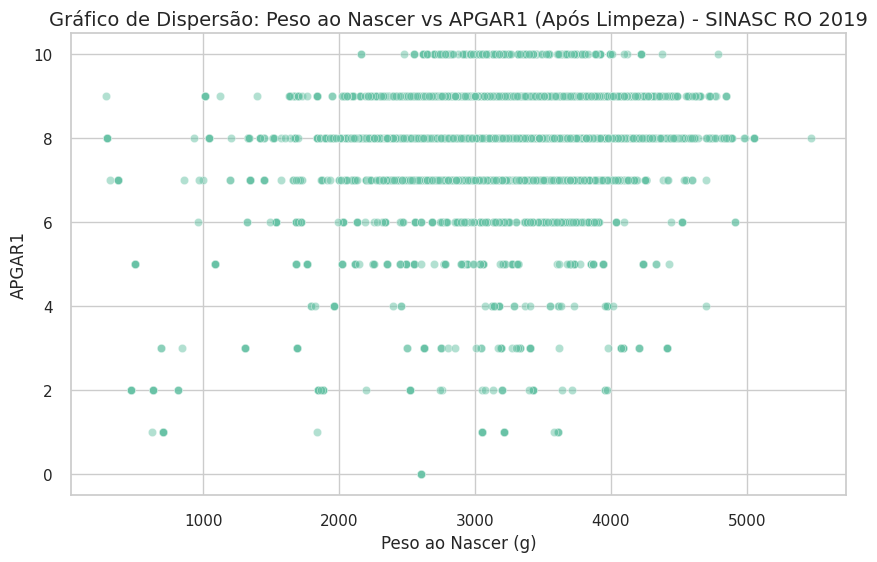

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='PESO', y='APGAR1', alpha=0.5)
plt.title('Gráfico de Dispersão: Peso ao Nascer vs APGAR1 (Após Limpeza) - SINASC RO 2019', fontsize=14)
plt.xlabel('Peso ao Nascer (g)')
plt.ylabel('APGAR1')
plt.show()

/tmp/ipython-input-4195371171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y='ESCMAE', order=df_cleaned['ESCMAE'].value_counts().index, palette='viridis')


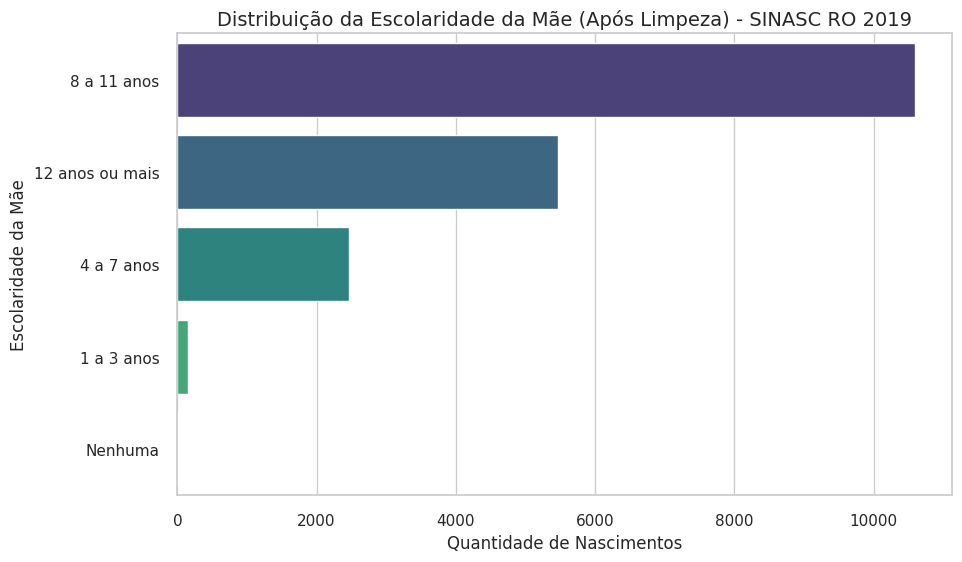

In [66]:
# Gráfico de barras da escolaridade da mãe (ESCMAE) usando df_cleaned
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, y='ESCMAE', order=df_cleaned['ESCMAE'].value_counts().index, palette='viridis')
plt.title('Distribuição da Escolaridade da Mãe (Após Limpeza) - SINASC RO 2019', fontsize=14)
plt.xlabel('Quantidade de Nascimentos')
plt.ylabel('Escolaridade da Mãe')
plt.show()

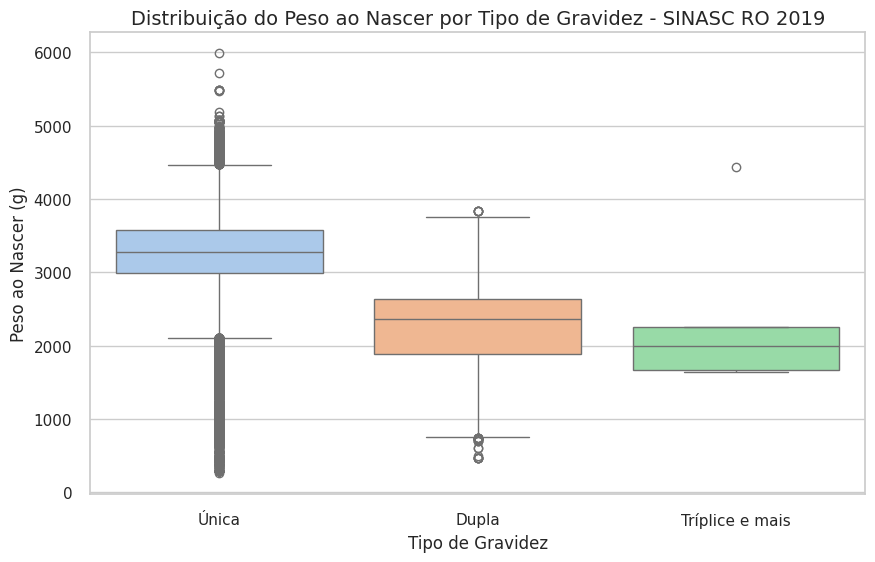

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GRAVIDEZ', y='PESO', hue='GRAVIDEZ', palette="pastel", legend=False)
plt.title('Distribuição do Peso ao Nascer por Tipo de Gravidez - SINASC RO 2019', fontsize=14)
plt.xlabel('Tipo de Gravidez')
plt.ylabel('Peso ao Nascer (g)')
plt.show()

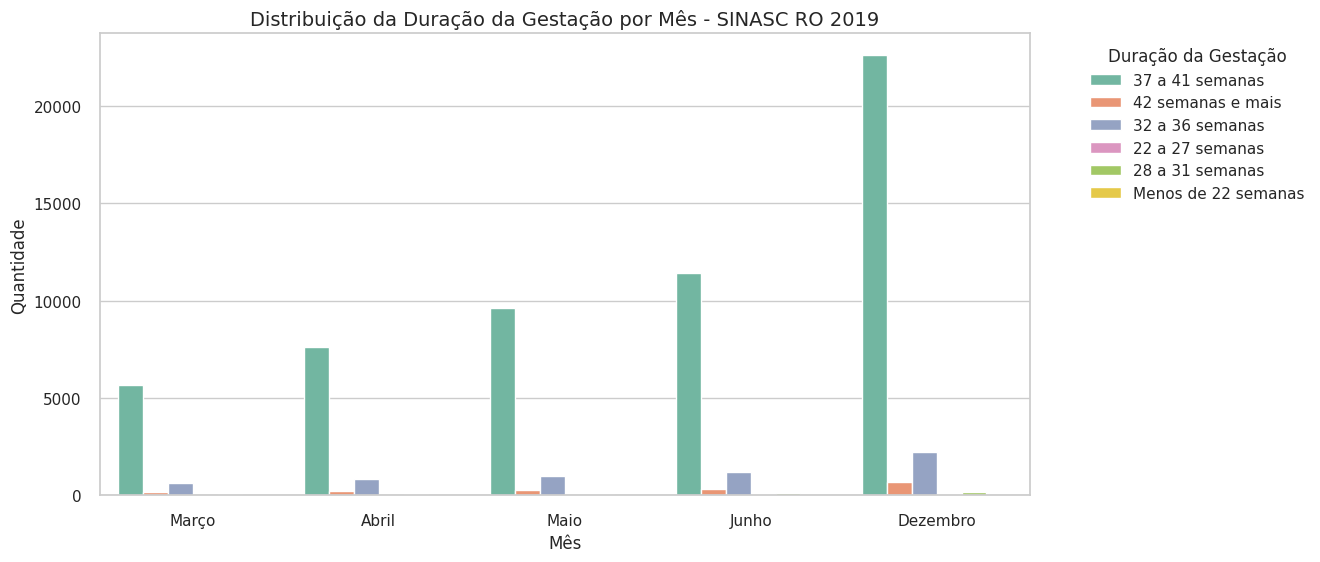

In [28]:
# Distribuição da duração da gestação por mês
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MES', hue='GESTACAO', order=arquivos.keys())
plt.title('Distribuição da Duração da Gestação por Mês - SINASC RO 2019', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.legend(title='Duração da Gestação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
    def plot_nascimentos_por_mes(dataframe, order):
        plt.figure()
        sns.countplot(data=dataframe, x='MES', order=order, color='skyblue')
        plt.title('Número de Nascimentos por Mês')
        plt.xlabel('Mês de Nascimento')
        plt.ylabel('Quantidade de Nascimentos')
        plt.show()

    # Exemplo de uso
    # plot_nascimentos_por_mes(df_2020, arquivos.keys()) # Se os meses forem os mesmos

## Automação



In [44]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    # Garante que o diretório para salvar gráficos exista
    def criar_diretorio_graficos(diretorio="./graficos"):
        if not os.path.exists(diretorio):
            os.makedirs(diretorio)
        return diretorio

    def plot_nascimentos_por_mes(dataframe, ordem_meses, periodo_str=""):
        """Gera e salva o gráfico de número de nascimentos por mês."""
        diretorio_salvar = criar_diretorio_graficos()
        plt.figure(figsize=(10, 5))
        sns.countplot(data=dataframe, x='MES', order=ordem_meses, color='skyblue')
        plt.title(f'Número de Nascimentos por Mês {periodo_str}', fontsize=14)
        plt.xlabel('Mês de Nascimento')
        plt.ylabel('Quantidade de Nascimentos')
        plt.xticks(rotation=45, ha='right') # Rotação para nomes de meses longos
        plt.tight_layout() # Ajusta o layout para evitar cortar rótulos
        plt.savefig(os.path.join(diretorio_salvar, f'nascimentos_por_mes_{periodo_str.replace(" ", "_")}.png'))
        plt.close() # Fecha a figura para não exibir no notebook se rodar muitos gráficos

    def plot_distribuicao_sexo(dataframe, ordem_meses, periodo_str=""):
        """Gera e salva o gráfico de distribuição de nascimentos por sexo e mês."""
        diretorio_salvar = criar_diretorio_graficos()
        plt.figure(figsize=(10, 5))
        sns.countplot(data=dataframe, x='MES', hue='SEXO', order=ordem_meses)
        plt.title(f'Distribuição de Nascimentos por Sexo e Mês {periodo_str}', fontsize=14)
        plt.xlabel('Mês')
        plt.ylabel('Quantidade de Nascimentos')
        plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(diretorio_salvar, f'distribuicao_sexo_{periodo_str.replace(" ", "_")}.png'))
        plt.close()

    # Adicione funções para os outros gráficos que você gerou (idade média mãe, boxplots, scatter plots, etc.)
    # Exemplo para idade média da mãe:
    def plot_idade_media_mae(dataframe, ordem_meses, periodo_str=""):
        """Gera e salva o gráfico de idade média das mães por mês."""
        diretorio_salvar = criar_diretorio_graficos()
        plt.figure(figsize=(10, 5))
        idade_media = dataframe.groupby('MES')['IDADEMAE'].mean().reindex(ordem_meses)
        sns.lineplot(x=idade_media.index, y=idade_media.values, marker='o', linewidth=2, color='purple')
        plt.title(f'Idade Média das Mães por Mês {periodo_str}', fontsize=14)
        plt.ylabel('Idade Média')
        plt.xlabel('Mês')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(diretorio_salvar, f'idade_media_mae_{periodo_str.replace(" ", "_")}.png'))
        plt.close()

In [45]:
    # Exemplo de script principal (conceitual)
    # diretorio_dados = '/content/dados_sinasc'
    # anos_para_analisar = [2019, 2020, 2021]
    # meses_para_analisar = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ'] # ou None para todos os meses

    # for ano in anos_para_analisar:
    #     print(f"Processando ano: {ano}")
    #     # Carrega os dados para o ano e meses especificados
    #     df_periodo = carregar_dados_por_periodo(diretorio_dados, ano=ano, meses=meses_para_analisar)

    #     if not df_periodo.empty:
    #         # Define a ordem dos meses carregados (pode ser dinâmico baseado nos dados)
    #         # Para 2019 e os meses selecionados, a ordem seria a mesma que você usou antes
    #         ordem_meses_carregados = [m for m in ['Março', 'Abril', 'Maio', 'Junho', 'Dezembro'] if m in df_periodo['MES'].unique()]
    #         periodo_str = f"- {ano}" # Ex: "- 2019"

    #         # Chama as funções de plotagem
    #         plot_nascimentos_por_mes(df_periodo, ordem_meses_carregados, periodo_str)
    #         plot_distribuicao_sexo(df_periodo, ordem_meses_carregados, periodo_str)
    #         plot_idade_media_mae(df_periodo, ordem_meses_carregados, periodo_str)
    #         # Chame aqui as funções para os outros gráficos...

    #     else:
    #         print(f"Nenhum dado encontrado para o ano {ano} e meses especificados.")

    # print("Automação de gráficos concluída.")

## Conclusão e Insights Baseados na Análise dos Dados SINASC RO 2019 (Mar, Abr, Mai, Jun, Dez)

Com base na análise exploratória dos dados de nascimento de Rondônia em 2019 para os meses de março, abril, maio, junho e dezembro, podemos destacar os seguintes pontos:

### Número de Nascimentos por Mês:
*   Observamos a variação na quantidade de nascimentos ao longo dos meses analisados (Mar, Abr, Mai, Jun, Dez). Dezembro apresentou o maior número de nascimentos entre os meses considerados.

### Distribuição por Sexo:
*   A distribuição entre nascimentos masculinos e femininos se mostrou bastante equilibrada em todos os meses analisados, com uma leve predominância de nascimentos masculinos.

### Idade da Mãe:
*   A idade média das mães se manteve relativamente estável em torno de 26 anos nos meses analisados.
*   Os boxplots da idade da mãe por mês e por escolaridade mostraram a dispersão da idade e indicaram que mães com menor escolaridade tendem a ter uma distribuição de idade com medianas ligeiramente mais baixas e, em alguns casos, com maior dispersão. O heatmap confirmou essa tendência, mostrando idades médias mais baixas para escolaridades menores em todos os meses.
*   Os gráficos de dispersão da idade da mãe vs APGAR1 e APGAR5 não indicaram uma correlação linear forte entre a idade da mãe e os escores APGAR.

### Peso ao Nascer e Escores APGAR:
*   Os gráficos de dispersão de Peso vs APGAR1 e Peso vs APGAR5 sugerem uma tendência de pesos mais altos estarem associados a escores APGAR mais altos, o que é clinicamente esperado.
*   A distribuição do peso ao nascer por tipo de gravidez (boxplot) mostrou que gestações únicas resultam em pesos ao nascer significativamente maiores do que gestações múltiplas (dupla, tripla), o que também é um achado esperado.

### Consultas Pré-Natal, Gestação e Tipo de Gravidez:
*   A distribuição do número de consultas pré-natal variou entre os meses, indicando a importância de monitorar o acesso ao pré-natal ao longo do ano. A maioria dos nascimentos ocorreu após 7 ou mais consultas.
*   A duração da gestação (GESTACAO) mostrou que a maioria dos nascimentos ocorreu entre 37 e 41 semanas (a termo) em todos os meses analisados.
*   A contagem de tipos de gravidez por mês confirmou que a grande maioria das gestações são únicas, com uma pequena proporção de gestações duplas ou triplas, distribuídas de forma relativamente consistente entre os meses.

### Escolaridade da Mãe:
*   A distribuição da escolaridade da mãe mostrou que a categoria "8 a 11 anos" foi a mais frequente entre as mães nos meses analisados, seguida por "12 anos ou mais" e "4 a 7 anos". Essa distribuição percentual se manteve relativamente constante ao longo dos meses.

### Valores Ausentes:
*   A verificação de valores ausentes destacou que a coluna IDADEPAI possui um grande número de dados faltantes, o que limita análises envolvendo essa variável. Outras colunas como GESTACAO, ESCMAE, APGAR1 e APGAR5 também apresentaram ausências que foram tratadas ao criar o DataFrame `df_cleaned`.

### Insights para Próximos Passos:
*   Investigar as causas dos valores ausentes, especialmente na coluna IDADEPAI.
*   Realizar análises mais aprofundadas utilizando o DataFrame `df_cleaned` para garantir que as conclusões não sejam afetadas por dados faltantes.
*   Explorar a relação entre a escolaridade da mãe e outros resultados de nascimento (como peso ao nascer e escores APGAR).
*   Analisar a coluna DTNASC para identificar padrões em níveis diários ou semanais.
*   Considerar a inclusão de dados de outros meses e anos para análises de tendência temporal mais robustas.
*   Implementar o processo de automação discutido para facilitar a análise de novos dados à medida que estiverem disponíveis.

Esta conclusão resume as principais observações visuais e estatísticas obtidas a partir dos dados analisados, fornecendo uma base para investigações futuras.